# **PART 3 - TIME SERIES DATA**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

**24. Define strict and weak stationarity.**
- A stochastic process is stationary if the joint distribution of a group $(x_{t_1},x_{t_2},..., x_{t_n})$ is the same as the joint distribution of another group $(x_{t_1+h},x_{t_2+h},..., x_{t_n+h})$, for every natural $h\geq 1$. An example of this can be seen in the graph 24.1, where every group of n consecutive variables follows a normal distribution with mean 0 and variance 1.
- A weak stationarity only requires that $E(x_t)$ is constant, $Var(x_t)$ is constant, and that the covariance $cov(x_t,x_{t+h})$ only depends on h.

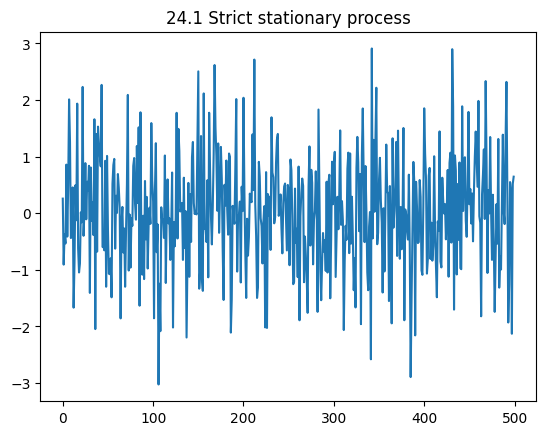

In [ ]:
#Gaussian Distribution

np.random.seed(43)
n=500
mean=0
std_dev=1
white_noise=np.random.normal(mean,std_dev,n)

#Plotting

plt.plot(white_noise)
plt.title("24.1 Strict stationary process")
plt.show()

**25. Explain ergodicity and state the ergodic theorem. Illustrate with an example.**
- The ergodicity is a property of some processes, obtained when the autocorrelation of some order tends towards 0 as the order increases.
- The ergodic theorem states that if the process is strictly stationary, ergodic and has an expected value lower than infinity, the time average will converge to the expected value.
- One example of this can be found in the logistic Map, shown in the graph 25.1, in which the time average tends towards the expected value (Graph 25.2)

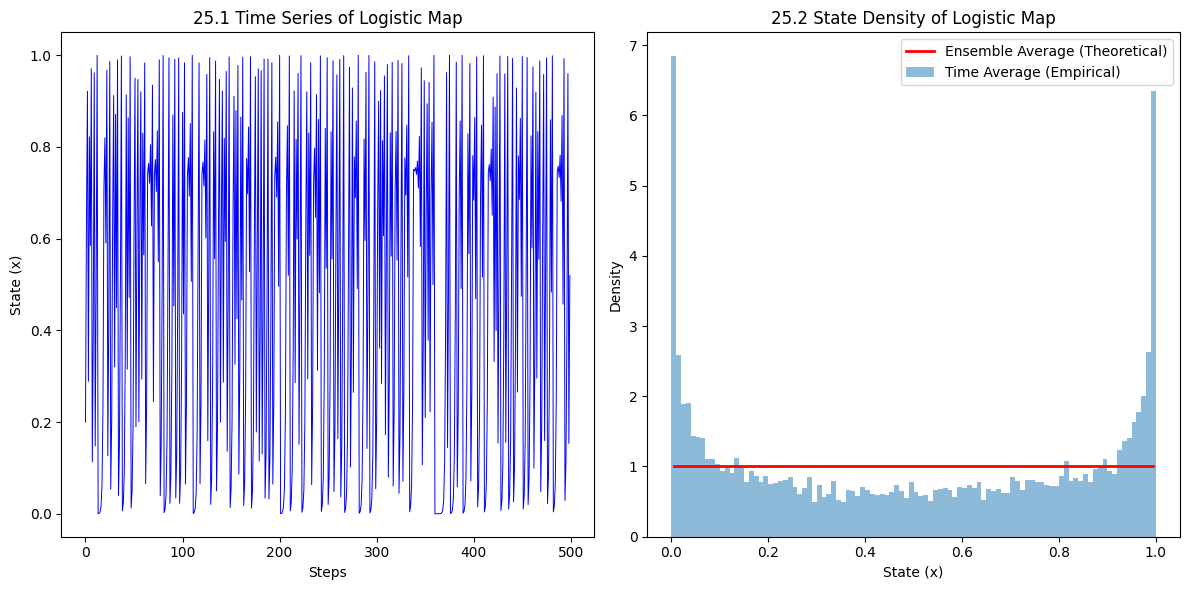

Time Average: 0.49848060682435497
Ensemble Average: 0.5


In [ ]:
# Step 1: Define the logistic map
def logistic_map(x, r):
    return r * x * (1 - x)

# Step 2: Simulate the process
def simulate_logistic_map(r, initial_x, num_steps):
    trajectory = [initial_x]
    x = initial_x
    for _ in range(num_steps):
        x = logistic_map(x, r)
        trajectory.append(x)
    return trajectory

# Parameters
r = 4.0  # Chaotic regime
initial_x = 0.2  # Initial state
num_steps = 10000  # Number of steps in the simulation

# Generate the trajectory
trajectory = simulate_logistic_map(r, initial_x, num_steps)

# Step 3: Compute Time Averages (Histogram as a proxy for distribution)
num_bins = 100
hist, bins = np.histogram(trajectory, bins=num_bins, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
uniform_density = np.ones_like(bin_centers)  # Uniform distribution on [0, 1]

# Step 4: Plot two graphs in a single figure
plt.figure(figsize=(12, 6))

# Subplot 1: Time Series of Logistic Map
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(trajectory[:500], color='blue', linewidth=0.7)
plt.title("25.1 Time Series of Logistic Map")
plt.xlabel("Steps")
plt.ylabel("State (x)")

# Subplot 2: Histogram vs. Uniform Distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), alpha=0.5, label="Time Average (Empirical)")
plt.plot(bin_centers, uniform_density, color='red', linewidth=2, label="Ensemble Average (Theoretical)")
plt.title("25.2 State Density of Logistic Map")
plt.xlabel("State (x)")
plt.ylabel("Density")
plt.legend()

# Show the combined plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Step 5: Validate Ergodicity
# Compute time average and ensemble average
time_average = np.mean(trajectory)
ensemble_average = 0.5  # Expected mean of uniform distribution on [0, 1]
print("Time Average:", time_average)
print("Ensemble Average:", ensemble_average)

**26.	Why do we need both stationarity and ergodicity?**
- On the one hand, stationarity ensures meaningful results related to a system's averages without worrying about statistical properties changing over time.
- On the other hand, ergodicity allows us to study the properties in a system without worrying that the current state is just a result of an initial state from a distant moment in time. In other words, we don't need to know the entirety of the system in time to infer its properties.
- Besides, the ergodic theorem serves as a link between time averages and ensemble averages, making possible to infer statistical properties of a system analyzing the trajectory in time.

**27.	Explain “spurious regression”.**
- An spurious regression happens when a group of time series are statistically related in a regression without having a real or genuine causal relationship, which could lead to incorrect conclusions about the relationship of two variables.
- Assuming homoskedasticity, an indicator of this cases could be a non stationary error.

**28.	Make all time series stationary by computing the difference between the original variable and a moving average of order 2x10. Give the formula for the exact weights.**
- The graph 28.1 shows the graph of GDP vs Time, which is clearly non-stationary due to a variable mean.
- The graph 28.2 shows the moving average of GDP

In [30]:
df = pd.read_excel('threecenturies_v2.3.xlsx', sheet_name='A1. Headline series', header=3, skiprows =[4,5,6], usecols=['Description','Real GDP at market prices', 'Unemployment rate', 'Consumer price inflation'])
df=df[(df['Description']<=2000) & (df['Description']>=1900)]
df= df.reset_index(drop=True)
df.head()

,Description,Real GDP at market prices,Unemployment rate,Consumer price inflation
0,1900,181160.264436,3.679865,4.058273
1,1901,184974.529384,4.877351,-0.300000
2,1902,187756.550527,5.145694,0.000000
3,1903,186015.768150,5.603507,1.103310
4,1904,188155.559259,6.914821,-0.396825


Text(0, 0.5, 'GDP')

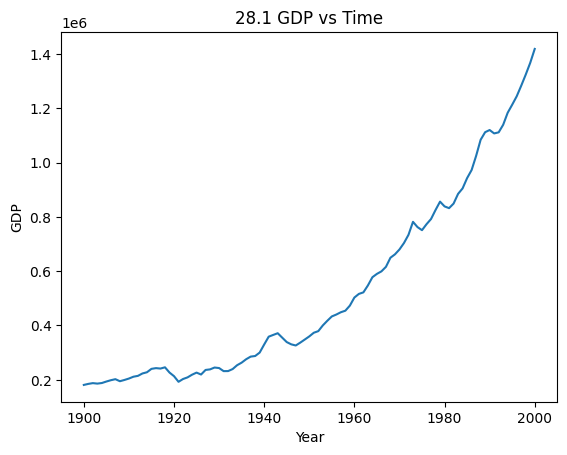

In [65]:
year=df['Description']
gdp=df['Real GDP at market prices']
plt.plot(year,gdp)
plt.title('28.1 GDP vs Time')
plt.xlabel('Year')
plt.ylabel('GDP')

In [84]:
window_size = 10
#weights= [2 * (window_size - i) for i in range(window_size)]  # [20, 18, ..., 2]
#weights= np.arange(1, window_size + 1)
#weights = np.array(weights)

# Define error function
def wls_error(weights, x, y):
    y_pred = np.dot(x, weights)
    return np.sum((y - y_pred)**2)

# Initial weights
initial_weights = np.ones(10) / 10  # Start with equal weights

# Minimize error to find weights
result = minimize(wls_error, initial_weights, args=(year, gdp), bounds=[(0, 1)]*10)
optimal_weights = result.year / np.sum(result.year)  # Normalize weights
print(optimal_weights)

# Compute the weighted moving average
#def weighted_moving_average(values, weights):
    #return np.dot(values, weights) / weights.sum()


#gdp1=gdp.rolling(window=10).apply(lambda x: weighted_moving_average(x, weights), raw=True)

gdp1=gdp.rolling(window=10).mean()

o1=gdp-gdp1

gdp2=gdp1.rolling(window=2).mean()

o2=gdp-gdp2
# Plot two graphs in a single figure
plt.figure(figsize=(12, 6))

# Subplot 1: Time Series of Logistic Map
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(gdp1, color='orange')
plt.plot(gdp2, color='blue')
plt.plot(bin_centers, uniform_density, color='orange', linewidth=2, label="order 10")
plt.plot(bin_centers, uniform_density, color='blue', linewidth=2, label="order 2x10")
plt.title("28.2 Moving Average of GDP")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()

# Subplot 2: Histogram vs. Uniform Distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(o1, color='orange')
plt.plot(o2, color='blue')
plt.plot(bin_centers, uniform_density, color='orange', linewidth=2, label="order 10")
plt.plot(bin_centers, uniform_density, color='blue', linewidth=2, label="order 2x10")
plt.title("28.3 Difference between the original value and moving average")
plt.xlabel('Year')
plt.legend()

# Show the combined plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


ValueError: shapes (101,) and (10,) not aligned: 101 (dim 0) != 10 (dim 0)

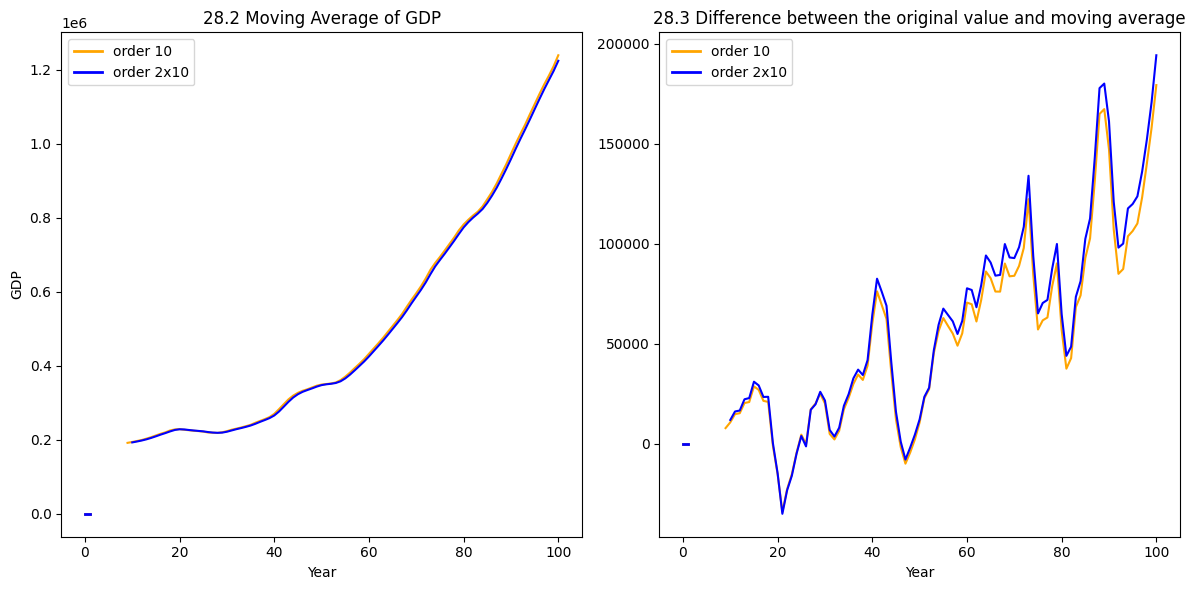

In [87]:
gdp1=gdp.rolling(window=10).mean()

o1=gdp-gdp1

gdp2=gdp1.rolling(window=2).mean()

o2=gdp-gdp2
# Plot two graphs in a single figure
plt.figure(figsize=(12, 6))

# Subplot 1: Time Series of Logistic Map
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(gdp1, color='orange')
plt.plot(gdp2, color='blue')
plt.plot(bin_centers, uniform_density, color='orange', linewidth=2, label="order 10")
plt.plot(bin_centers, uniform_density, color='blue', linewidth=2, label="order 2x10")
plt.title("28.2 Moving Average of GDP")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()

# Subplot 2: Histogram vs. Uniform Distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(o1, color='orange')
plt.plot(o2, color='blue')
plt.plot(bin_centers, uniform_density, color='orange', linewidth=2, label="order 10")
plt.plot(bin_centers, uniform_density, color='blue', linewidth=2, label="order 2x10")
plt.title("28.3 Difference between the original value and moving average")
plt.xlabel('Year')
plt.legend()

# Show the combined plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

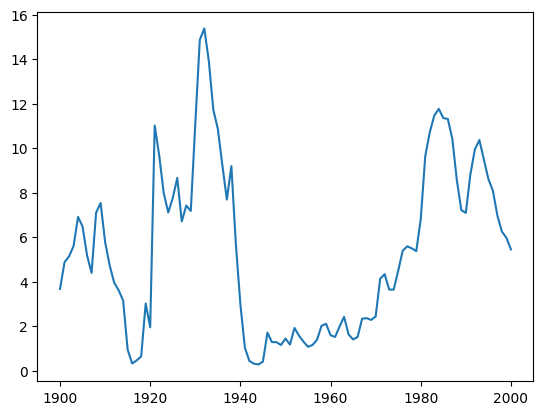

In [ ]:
urate=df['Unemployment rate']
plt.plot(year,urate)

This one is not stationary either since neither the mean nor the variance are constant.

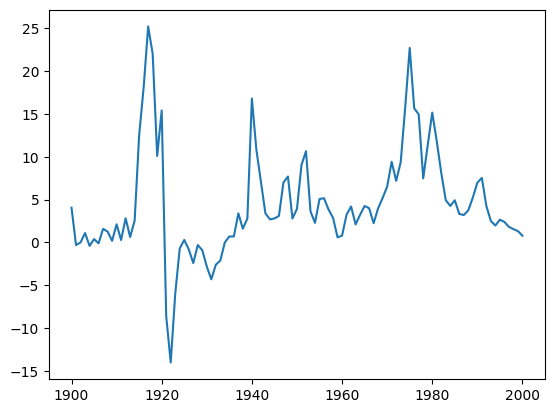

In [ ]:
inflation= df['Consumer price inflation']
plt.plot(year,inflation)

This is not stationary, because the variance is not constant

## Part 1

<ipython-input-27-273e5104cfbc>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('BARIUM.raw', delim_whitespace=True, header=None)


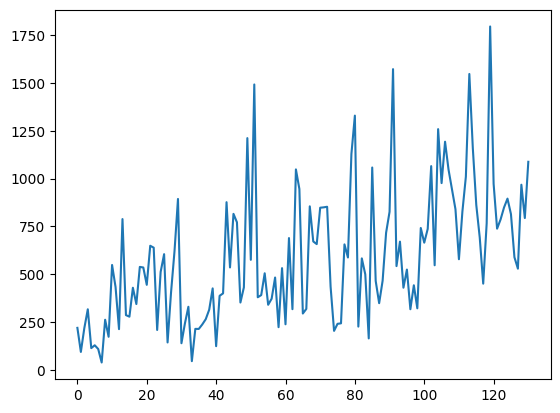

In [27]:
df=pd.read_csv('BARIUM.raw', delim_whitespace=True, header=None)
barium=df[0]
plt.plot(barium)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     58.61
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           3.97e-12
Time:                        13:38:19   Log-Likelihood:                -928.06
No. Observations:                 131   AIC:                             1860.
Df Residuals:                     129   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5563     51.136      4.880      0.0

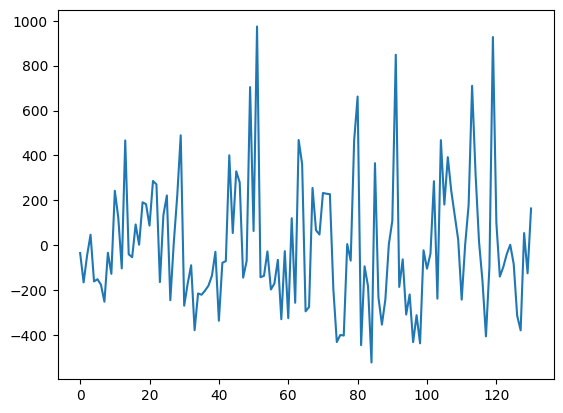

In [21]:
n=len(barium)
const=np.ones(n)
t=df[18]
X=np.column_stack((const, t))
y=barium
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())
o1=results.resid
plt.plot(o1)

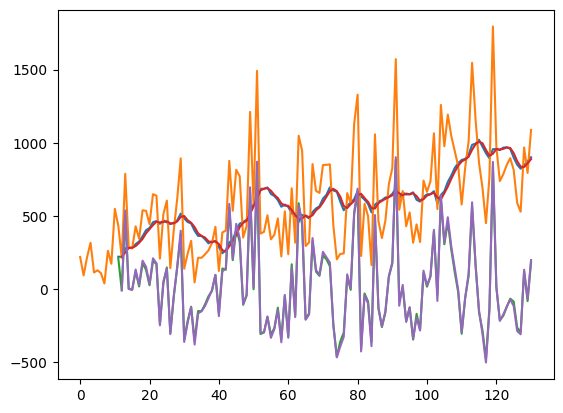

In [26]:
t2=barium.rolling(window=12).mean()
plt.plot(t2)
plt.plot(barium)
o2=barium-t2
plt.plot(o2)
t3= t2.rolling(window=2).mean()
plt.plot(t3)
o3=barium-t3
plt.plot(o3)